In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# Importar librerias

In [1]:
import numpy as np 
import pandas as pd 
from   datetime import datetime, timedelta
import os
import glob
import scipy as sc
import seaborn as sns
# import sympy as sp

#Librería de graficación
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# Personalizar graficas
plt.style.use('default')
mpl.rcParams['xtick.labelsize']=14
mpl.rcParams['ytick.labelsize']=14
mpl.rcParams['font.sans-serif'] = "Century Gothic"
mpl.rcParams['font.family'] = "Century Gothic"
mpl.rcParams['font.weight'] = 'normal'

plt.style.use("seaborn")

In [2]:
pd.read_excel

<function pandas.io.excel._base.read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=None, mangle_dupe_cols=True, storage_options: 'StorageOptions' = None)>

# EDA

## Leer datos

In [3]:
df_data = pd.read_excel("/content/drive/Othercomputers/My Computer/Maestria_Sem_II/MachineLearning/FinalWork/Data/DataWaveBreaking.xlsx",
                        sheet_name="Consolidado2")

df_data = df_data.dropna().reset_index(drop=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   m (slope)  280 non-null    float64
 1   T (s)      280 non-null    float64
 2   Lo (cm)    280 non-null    float64
 3   Ho (cm)    280 non-null    object 
 4   Ho/Lo      280 non-null    object 
 5   Hb (cm)    280 non-null    float64
 6   hb (cm)    280 non-null    float64
 7   Hb/hb      280 non-null    float64
dtypes: float64(6), object(2)
memory usage: 17.6+ KB


In [4]:
df_data["Ho (cm)"] = pd.to_numeric(df_data["Ho (cm)"], errors='coerce')
df_data["Ho/Lo"] = pd.to_numeric(df_data["Ho/Lo"], errors='coerce')
df_data = df_data.dropna().reset_index(drop=True)
df_data.describe().round(3)


,m (slope),T (s),Lo (cm),Ho (cm),Ho/Lo,Hb (cm),hb (cm),Hb/hb
count,277.000,277.000,277.000,277.000,277.000,277.000,277.000,277.000
mean,0.059,1.661,497.681,10.581,0.034,12.570,14.367,0.935
std,0.054,0.793,677.935,10.729,0.022,12.504,16.125,0.587
min,0.003,0.700,76.400,1.036,0.001,2.438,3.048,0.542
25%,0.012,1.200,224.600,7.200,0.017,9.144,9.900,0.766
50%,0.050,1.500,351.300,9.800,0.030,11.440,12.500,0.877
75%,0.100,2.000,613.000,12.200,0.048,13.700,16.300,1.031
max,0.200,6.000,5623.560,137.000,0.127,150.000,200.000,10.167


In [123]:
df_data.head()

,m (slope),T (s),Lo (cm),Ho (cm),Ho/Lo,Hb (cm),hb (cm),Hb/hb
0,0.0125,1.2,224.6,8.8,0.039,8.6,12.5,0.688000
1,0.0125,1.2,224.6,9.1,0.041,9.1,12.5,0.728000
2,0.0125,1.2,224.6,12.0,0.053,12.2,13.8,0.884058
3,0.0125,1.2,224.6,14.8,0.066,14.2,16.3,0.871166
4,0.0125,1.2,224.6,11.7,0.052,11.6,16.3,0.711656


In [6]:
# df_simpl = df_data[["m (slope)","T (s)","Lo (cm)","Ho (cm)","Hb (cm)","hb (cm)"]]
df_simpl = df_data[["m (slope)","T (s)","Lo (cm)","Ho (cm)","Hb/hb"]]
df_simpl

,m (slope),T (s),Lo (cm),Ho (cm),Hb/hb
0,0.0125,1.2,224.6,8.8,0.688000
1,0.0125,1.2,224.6,9.1,0.728000
2,0.0125,1.2,224.6,12.0,0.884058
3,0.0125,1.2,224.6,14.8,0.871166
4,0.0125,1.2,224.6,11.7,0.711656
...,...,...,...,...,...
272,0.0500,3.0,598.0,10.0,1.108889
273,0.0500,3.0,613.0,15.0,1.023590
274,0.0500,4.0,794.0,5.0,0.958571
275,0.0500,4.0,816.0,10.0,0.932500


## Graficas

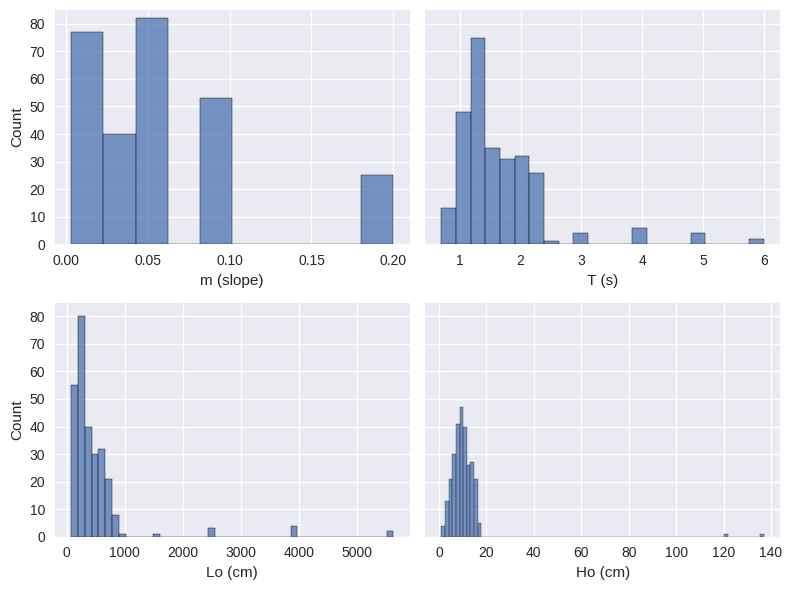

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6),sharey=True)
# sns.histplot(data=df_data, x="m (slope)", ax=axs[0])
sns.histplot(data=df_data, x="m (slope)", ax=axs[0,0])
axs[0,0].set(yticks=np.arange(0,81,10),ylim=[0,85])
sns.histplot(data=df_data, x="T (s)", ax=axs[0,1])
sns.histplot(data=df_data, x="Lo (cm)", ax=axs[1,0])
sns.histplot(data=df_data, x="Ho (cm)", ax=axs[1,1])
fig.tight_layout()

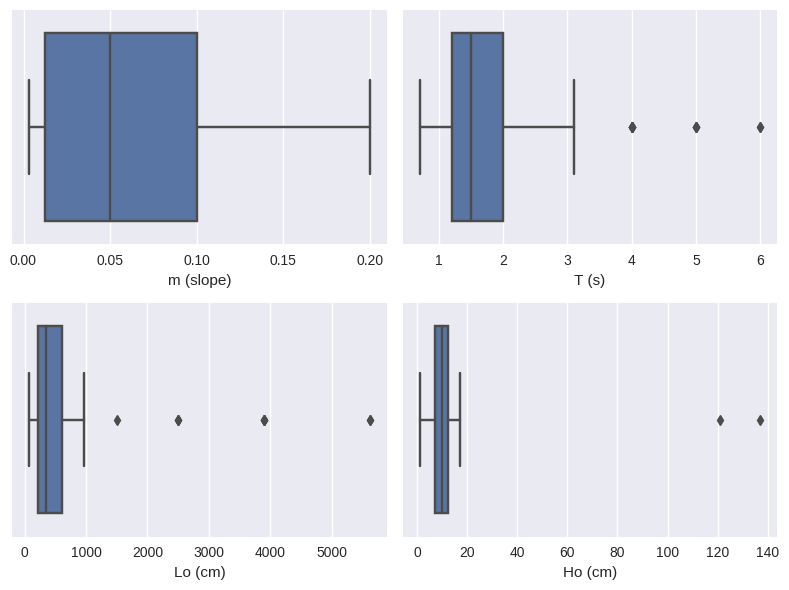

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
# sns.histplot(data=df_data, x="m (slope)", ax=axs[0])
sns.boxplot(data=df_data, x="m (slope)", ax=axs[0,0])
sns.boxplot(data=df_data, x="T (s)", ax=axs[0,1])
sns.boxplot(data=df_data, x="Lo (cm)", ax=axs[1,0])
sns.boxplot(data=df_data, x="Ho (cm)", ax=axs[1,1])
fig.tight_layout()

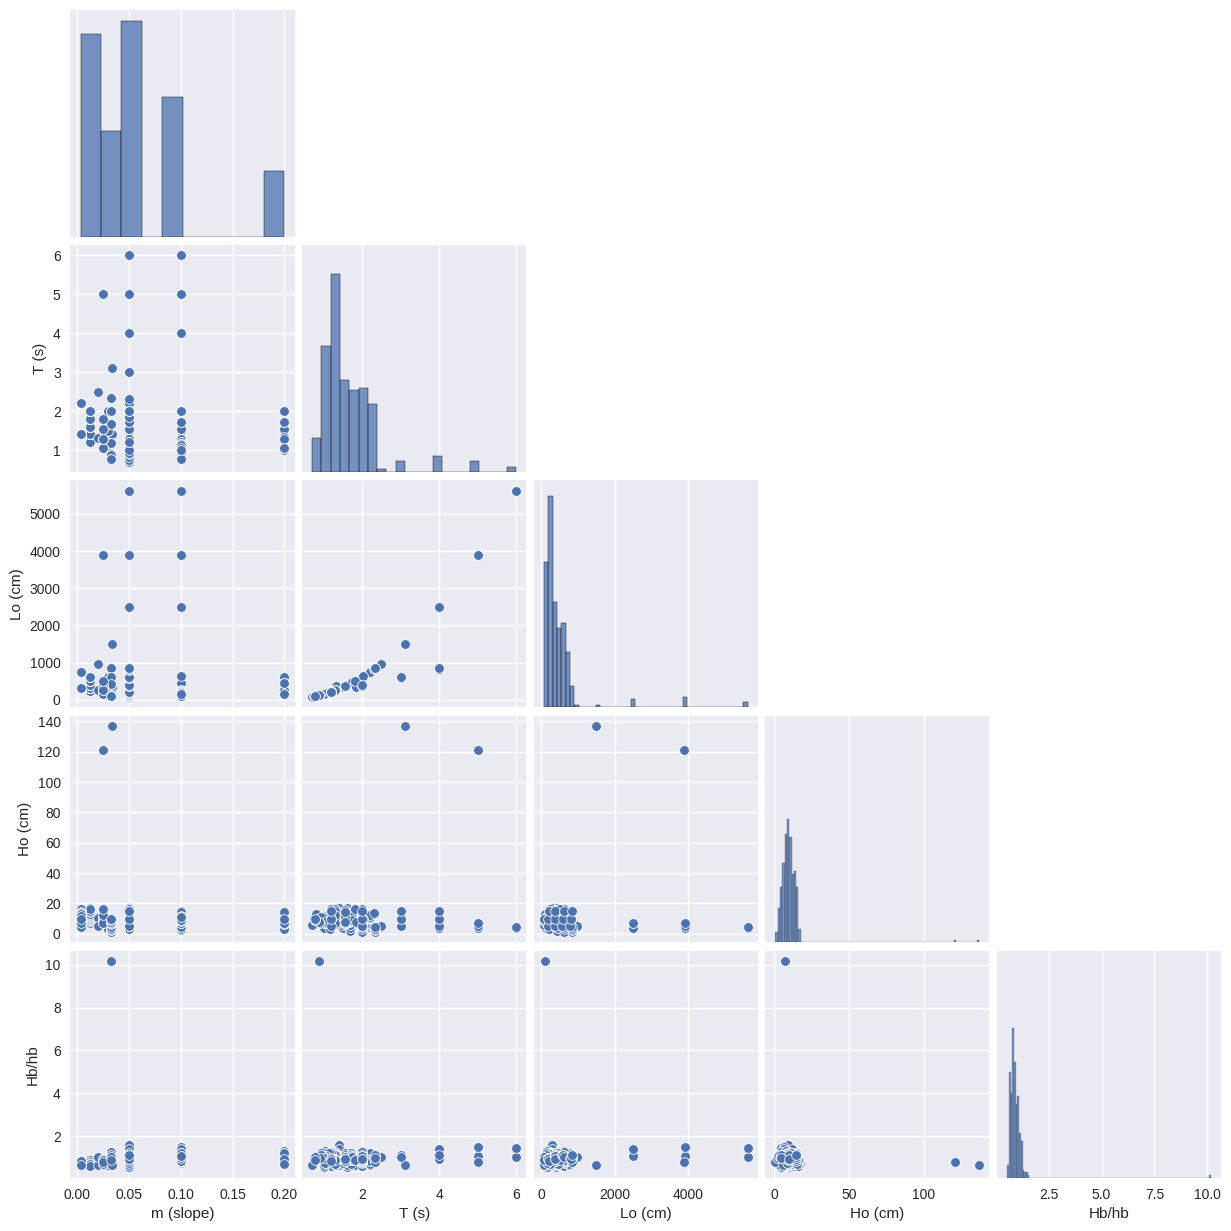

In [9]:
sns.pairplot(data=df_simpl, corner=True)

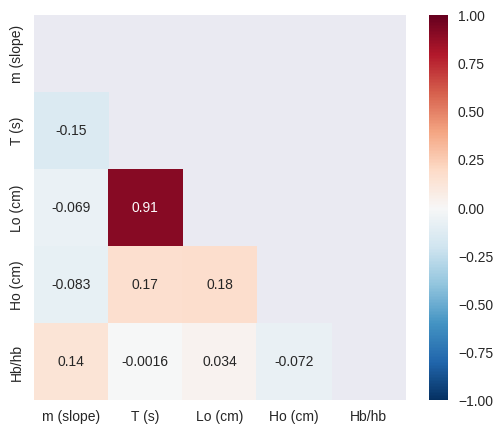

In [10]:
plt.figure(figsize=(6,5))

corr = df_simpl.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(df_simpl.corr(), annot=True, mask=matrix, cmap=plt.cm.RdBu_r, center = 0, vmin=-1,vmax=1)

# Seleccion de variables

In [11]:
X = df_simpl.iloc[:,:-1]
Y = df_simpl.iloc[:,-1]
X

,m (slope),T (s),Lo (cm),Ho (cm)
0,0.0125,1.2,224.6,8.8
1,0.0125,1.2,224.6,9.1
2,0.0125,1.2,224.6,12.0
3,0.0125,1.2,224.6,14.8
4,0.0125,1.2,224.6,11.7
...,...,...,...,...
272,0.0500,3.0,598.0,10.0
273,0.0500,3.0,613.0,15.0
274,0.0500,4.0,794.0,5.0
275,0.0500,4.0,816.0,10.0


In [12]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.001)
selector.fit(X)
print(selector.get_support())
X.columns[selector.get_support()] 

[ True  True  True  True]


Index(['m (slope)', 'T (s)', 'Lo (cm)', 'Ho (cm)'], dtype='object')

## Univariado (X --- Y)

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

variables = SelectKBest(score_func=mutual_info_regression, k=3)
variables.fit(X,Y)
print(variables.get_params)
X.columns[variables.get_support()]

<bound method BaseEstimator.get_params of SelectKBest(k=3, score_func=<function mutual_info_regression at 0x7fb748d0b8c0>)>


Index(['m (slope)', 'T (s)', 'Lo (cm)'], dtype='object')

## RFE

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

rfe=RFE(estimator=LinearRegression(),n_features_to_select = 3, step = 1)
fit=rfe.fit(X,Y)
print(fit.n_features_)
print(fit.support_)
print(X.columns[fit.support_])
print(fit.ranking_)

3
[ True  True False  True]
Index(['m (slope)', 'T (s)', 'Ho (cm)'], dtype='object')
[1 1 2 1]


## SelectFromModel

In [15]:
from sklearn.feature_selection import SelectFromModel

sfm_selector = SelectFromModel(estimator=LinearRegression())
sfm_selector.fit(X, Y)
X.columns[sfm_selector.get_support()]

Index(['m (slope)'], dtype='object')

## *Sequential Feature Selection* (SFS)

In [16]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select = 3, cv =10, direction ='backward')
sfs_selector.fit(X, Y)
X.columns[sfs_selector.get_support()]

Index(['m (slope)', 'T (s)', 'Lo (cm)'], dtype='object')

## ELI5

In [17]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.9 MB/s 
     |████████████████████████████████| 133 kB 59.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=31b41d34bf1805b692c4f7778e9a96bebade8e66dfaa426ad05e5cb36a4c9a95
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [18]:
import eli5
from eli5.sklearn import PermutationImportance

model = LinearRegression()
model.fit(X,Y)
perm = PermutationImportance(model).fit(X, Y)
eli5.show_weights(model)


Weight?,Feature
+1.392,x0
+0.968,<BIAS>
+0.000,x2
-0.004,x3
-0.087,x1


## Modelo Ensamblado

In [19]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


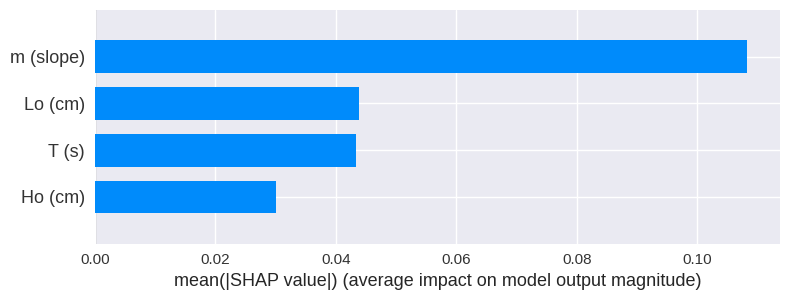

In [20]:
import shap
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=6, n_estimators=10)
model.fit(X, Y)
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

# Validacion cruzada

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## train-test-split

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train,Y_test = train_test_split(X,Y, train_size=0.8, random_state=1)

print('Dimensiones de la matriz para entrenar:',X_train.shape)
print('Dimensiones del vector para entrenar:',Y_train.shape)
print('Dimensiones de la matriz para validar:',X_test.shape)
print('Dimensiones del vector para validar:',Y_test.shape)

Dimensiones de la matriz para entrenar: (221, 4)
Dimensiones del vector para entrenar: (221,)
Dimensiones de la matriz para validar: (56, 4)
Dimensiones del vector para validar: (56,)


In [23]:
from sklearn.utils import class_weight
LinearRegression().fit(X_train,Y_train).score(X_test,Y_test)

0.19370803274679838

## K-fold

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle= True,random_state=1)
model = RandomForestRegressor()
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

[ 1.98453428e-01 -9.65449895e+00  3.64298853e-01 -1.51256217e-03
 -1.53317449e+01]
-4.885000818329289
6.4672665818915105


## Cross-validate

In [25]:
from sklearn.model_selection import cross_validate

results_ridge = cross_validate(Ridge(),X,Y,return_train_score=True,cv=5)
results_ridge 

test_scores = results_ridge['test_score']
train_scores = results_ridge['train_score']
print('Train scores:', np.mean(train_scores))
print('Test scores:', np.mean(test_scores))

Train scores: 0.08442851716838082
Test scores: -2.37825582680789


In [26]:
Y

0      0.688000
1      0.728000
2      0.884058
3      0.871166
4      0.711656
         ...   
272    1.108889
273    1.023590
274    0.958571
275    0.932500
276    1.124667
Name: Hb/hb, Length: 277, dtype: float64

In [27]:
results_lasso = cross_validate(Lasso(),X,Y,return_train_score=True,cv=5)
results_lasso

test_scores = results_lasso['test_score']
train_scores = results_lasso['train_score']
print('Train scores:', np.mean(train_scores))
print('Test scores:', np.mean(test_scores))

Train scores: 0.01805375353037695
Test scores: -3.173830242593918


## Leave One Out

In [28]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=loocv, scoring='r2')
print(results.mean())
print(results.std())

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is n

nan
nan


R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is n

## ShuffleSplit

In [29]:
from sklearn.model_selection import ShuffleSplit

kfold = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

[-0.00940497 -0.30678566 -0.01748631  0.04022299  0.24062354]
-0.010566084446902147
0.1751976199976605


# Selección hiperparametros

## ValidationCurve

In [30]:
from sklearn.neighbors import KNeighborsRegressor

results=cross_validate(KNeighborsRegressor(n_neighbors=10), X, Y, cv=5)
results

{'fit_time': array([0.00393391, 0.00237894, 0.00201154, 0.0022161 , 0.00189328]),
 'score_time': array([0.0036037 , 0.00221038, 0.00209355, 0.00204873, 0.00207734]),
 'test_score': array([-13.53157455,  -0.55522424,  -1.17157903,  -0.2649321 ,
         -0.03203418])}

In [31]:
from sklearn.model_selection import validation_curve
k = np.arange(2,100,2)

train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, Y, param_name='n_neighbors', param_range=k, cv=6)

In [32]:
print(test_scores)

[[-14.39963778  -0.49234062  -1.13896305  -1.13425999  -2.23616619
   -0.05502193]
 [-14.457072    -0.61431424  -0.44848491  -0.89518083  -1.9585087
   -0.01782847]
 [-14.0938026   -0.59297043  -2.16820806  -0.83759665  -1.57503893
   -0.01837262]
 [-13.13626815  -0.74273208  -1.34784937  -0.82783896  -1.36047104
   -0.0345614 ]
 [-12.68739757  -0.79063915  -0.95036579  -0.78089772  -1.18811375
   -0.03918846]
 [-11.27741737  -0.71231249  -0.81913234  -0.76269014  -0.71624797
   -0.05316618]
 [-10.59093098  -0.75527684  -0.62837826  -0.84935204  -0.85810877
   -0.05733747]
 [-10.76622938  -0.67376339  -0.55914246  -0.8548865   -0.70350987
   -0.05298036]
 [-10.48065982  -0.64714543  -0.46227749  -0.97327028  -0.66640966
   -0.05404256]
 [-10.16535059  -0.54999751  -0.44816844  -0.98203388  -0.64220145
   -0.05068589]
 [-10.15714761  -0.4729696   -0.38681537  -1.02791322  -0.58921192
   -0.04722655]
 [-10.12924743  -0.35428494  -0.38650194  -1.05932669  -0.63107329
   -0.0454261 ]
 [ -9

In [33]:
np.mean(train_scores,axis=1)

array([0.55859619, 0.40042397, 0.28983559, 0.13227686, 0.1436719 ,
       0.14259382, 0.13617602, 0.13098086, 0.12360075, 0.11186167,
       0.10139011, 0.09146435, 0.08027792, 0.07272737, 0.06864827,
       0.06319112, 0.05834492, 0.05443136, 0.04796292, 0.04462978,
       0.04163731, 0.04003448, 0.03713127, 0.03253222, 0.03185572,
       0.0301031 , 0.02934903, 0.02882625, 0.02486675, 0.02402626,
       0.02256643, 0.02109503, 0.01968398, 0.01853525, 0.01779259,
       0.01662312, 0.01579555, 0.01542163, 0.01508233, 0.01570546,
       0.01484769, 0.01590261, 0.01659781, 0.01736536, 0.01826533,
       0.01873293, 0.01815707, 0.01769686, 0.01739422])

In [34]:
np.mean(test_scores,axis=1)

array([-3.24273159, -3.06523152, -3.21433155, -2.90828683, -2.73943374,
       -2.39016108, -2.28989739, -2.26841866, -2.21396754, -2.13973963,
       -2.11354738, -2.10097673, -2.00945699, -1.91544909, -1.8834925 ,
       -1.87564425, -1.98229921, -1.94247068, -1.87896979, -1.82755802,
       -1.79506569, -1.80198816, -1.97661069, -2.06237148, -2.02253413,
       -1.97481046, -1.96713756, -1.951384  , -1.9326105 , -1.92734334,
       -1.89778937, -1.88456834, -1.86568475, -1.83906621, -1.82508052,
       -1.82002512, -1.80948516, -1.81433748, -1.82524184, -1.81074697,
       -1.8283785 , -1.82664885, -1.82905201, -1.82878077, -1.83132023,
       -1.81930166, -1.83427802, -1.83461644, -1.80924576])

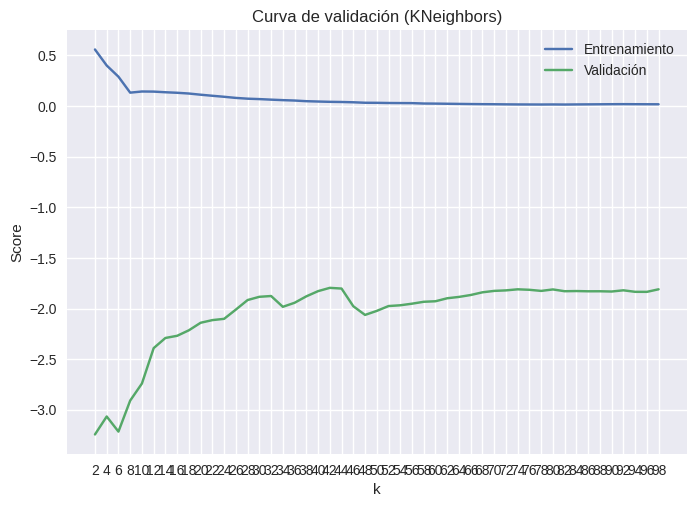

In [35]:
plt.figure()
plt.title("Curva de validación (KNeighbors)")    
plt.xlabel("k")
plt.ylabel("Score")
plt.plot(np.mean(train_scores,axis=1),label="Entrenamiento")
plt.plot(np.mean(test_scores,axis=1),label="Validación")
#plt.ylim(0, 1)
plt.xticks(np.arange(49),k)
plt.legend(loc="best")
plt.grid(True);

## YellowBrick

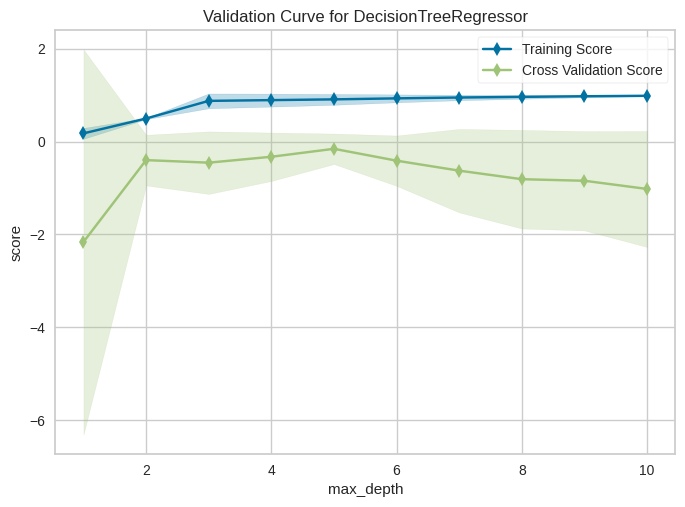

In [36]:
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.datasets import load_energy

from sklearn.tree import DecisionTreeRegressor
viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=np.arange(1, 11), cv=5, scoring="r2")
viz.fit(X, Y)
viz.show();

## Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV

alphas = np.array([310, 100, 10,1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

-2.0610730525629224
0.0


With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.498e+01, tolerance: 9.102e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.519e+01, tolerance: 9.210e-03 Linear regression mod

## Randon Search

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=1)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

-2.061112135732732
0.00011437481734488664


# Metricas

## MAE

In [39]:
kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_absolute_error')
print(results)
print(results.mean())
print(results.std())

[-0.23682848 -0.15136626 -0.1331045  -0.13129801 -0.33664304]
-0.19784805805511843
0.07945403078473127


## MSE

In [40]:
results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())
print(results.std())

-0.36424030715937583
0.6471014846465508


## R2 Metric

In [41]:
kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold, scoring='r2')
print(results.mean())
print(results.std())

-2.0610730525628873
3.884642237792491


# BIAS - Variance

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)
lr=LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

## RL - KNN

In [43]:
train_score=lr.score(X_train, Y_train)
test_score=lr.score(X_test, Y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.3434478083464312
Test score: -0.01720987433507215


In [44]:
kn = KNeighborsRegressor()
kn.fit(X_train, Y_train)


KNeighborsRegressor()

In [45]:
train_score=kn.score(X_train, Y_train)
test_score=kn.score(X_test, Y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.3193937684299155
Test score: 0.01254774783912782


Los resultados señalan un pobre ajuste, tanto para los datos de entrenamiento como los datos de validación, por lo tanto estamos ante un sub-ajuste del modelo (*bias*). Es decir el modelo no se ajusta adecuadamente a los datos.

## Learning Curve

In [46]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=5),X_train,Y_train,cv=5)
samples, train, test = lc[0], lc[1], lc[2]
lc

(array([ 16,  53,  90, 127, 165]),
 array([[0.07895925, 0.13322291, 0.13322291, 0.13322291, 0.13322291],
        [0.37591029, 0.19178243, 0.12962885, 0.12962885, 0.12962885],
        [0.28618472, 0.2050392 , 0.36086102, 0.32353349, 0.32353349],
        [0.3683732 , 0.34749948, 0.38665946, 0.29950642, 0.31225869],
        [0.30912626, 0.33092682, 0.3716392 , 0.29787296, 0.33175561]]),
 array([[-0.17216183, -0.46297641, -0.0582895 , -0.00614504, -0.01548659],
        [-0.34229664, -0.16274704, -0.19618   ,  0.00784813, -0.01786405],
        [-0.03208848, -0.24729368, -0.29783424,  0.01886877, -0.42296049],
        [ 0.03328806, -0.07316809, -0.01372733,  0.10539907, -0.30564642],
        [ 0.02258523, -0.05195892, -0.10245812,  0.12517821, -0.19122151]]))

Text(0.5, 1.0, 'Learning Curve')

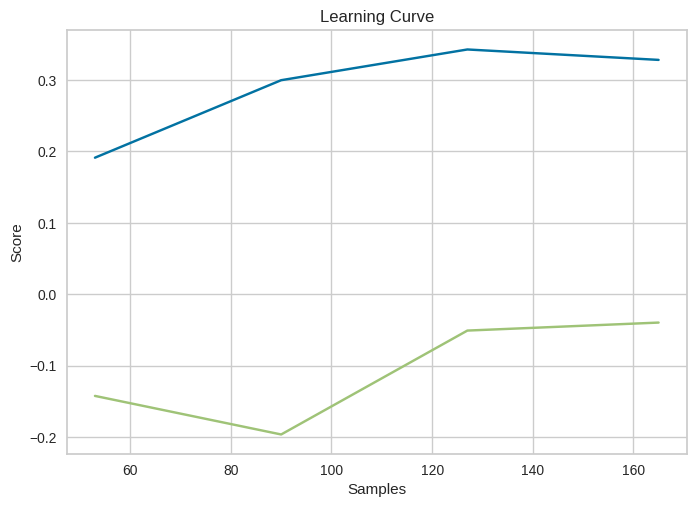

In [47]:
plt.figure()
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])
plt.ylabel('Score')
plt.xlabel('Samples')

plt.title("Learning Curve")

# Clustering

In [48]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D

## KMeans

In [49]:
km = KMeans(n_clusters=4)
model=km.fit(X)
y_kmeans=model.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 0, 3, 0, 2, 2, 1, 2,
       2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2], dtype=int32)

In [50]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 0, 3, 0, 2, 2, 1, 2,
       2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2], dtype=int32)

In [51]:
centroids = model.cluster_centers_
print(centroids)
print('número de datos asignados a cada centroide:')
print(np.bincount(y_kmeans))

[[6.97100000e-02 1.30057592e+00 2.69799844e+02 1.02420993e+01]
 [6.07142857e-02 4.57142857e+00 3.30164914e+03 2.21189714e+01]
 [3.28848052e-02 2.17701299e+00 6.74897195e+02 1.05363730e+01]
 [7.50000000e-02 6.00000000e+00 5.62356000e+03 4.26720000e+00]]
número de datos asignados a cada centroide:
[191   7  77   2]


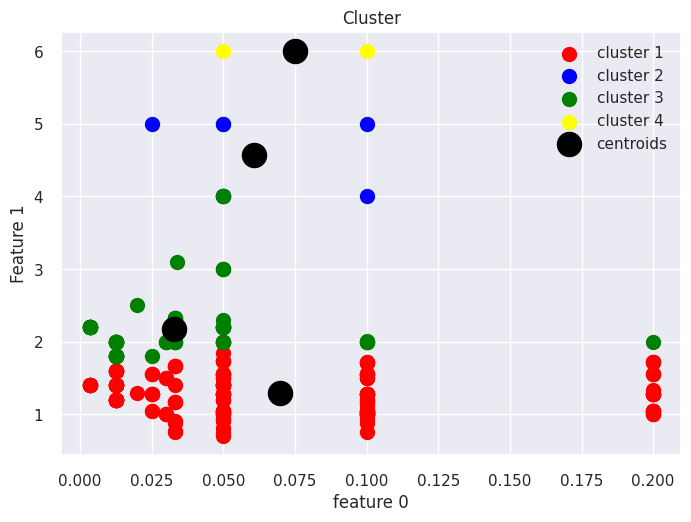

In [53]:
import matplotlib.pyplot as plt
sns.set()
X=np.array(X)
plt.figure()
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='yellow',label='cluster 4')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='black', label='centroids')
plt.title('Cluster')
plt.xlabel("feature 0")
plt.ylabel("Feature 1")
plt.legend()

## Hierarchical clustering

In [54]:
from scipy.spatial import distance_matrix
dd1=pd.DataFrame(distance_matrix(X,X,p=1))  ##distancia de Manhattan
dd1.head()

,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
0,0.0,0.3,3.2,6.0,2.9,4.2,4.5,4.7,5.8,5.4,...,24.8375,152.0375,156.4375,171.4375,364.0375,376.4375,396.4375,576.0375,595.4375,626.4375
1,0.3,0.0,2.9,5.7,2.6,3.9,4.2,4.4,5.5,5.1,...,24.5375,152.3375,156.1375,171.1375,364.3375,376.1375,396.1375,576.3375,595.1375,626.1375
2,3.2,2.9,0.0,2.8,0.3,1.0,1.3,1.5,2.6,2.2,...,21.6375,155.2375,157.2375,168.2375,367.2375,377.2375,393.2375,579.2375,596.2375,623.2375
3,6.0,5.7,2.8,0.0,3.1,1.8,1.5,1.3,0.2,0.6,...,18.8375,158.0375,160.0375,165.4375,370.0375,380.0375,390.4375,582.0375,599.0375,620.4375
4,2.9,2.6,0.3,3.1,0.0,1.3,1.6,1.8,2.9,2.5,...,21.9375,154.9375,156.9375,168.5375,366.9375,376.9375,393.5375,578.9375,595.9375,623.5375


In [55]:
dd2=pd.DataFrame(distance_matrix(X,X,p=2)) #distancia Euclidiana
dd2.head()

,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
0,0.0,0.3,3.2,6.0,2.9,4.2,4.5,4.7,5.8,5.4,...,19.606157,147.451149,154.406740,164.518818,358.424666,373.406269,388.453654,569.419565,591.407847,617.437480
1,0.3,0.0,2.9,5.7,2.6,3.9,4.2,4.4,5.5,5.1,...,19.513365,147.459186,154.404700,164.507785,358.427972,373.405425,388.448982,569.421646,591.407314,617.434540
2,3.2,2.9,0.0,2.8,0.3,1.0,1.3,1.5,2.6,2.2,...,18.840419,147.568294,154.415030,164.429320,358.472874,373.409696,388.415758,569.449911,591.410011,617.413639
3,6.0,5.7,2.8,0.0,3.1,1.8,1.5,1.3,0.2,0.6,...,18.601113,147.727592,154.476669,164.402072,358.538480,373.435190,388.404224,569.491213,591.426108,617.406383
4,2.9,2.6,0.3,3.1,0.0,1.3,1.6,1.8,2.9,2.5,...,18.890511,147.554368,154.411435,164.435067,358.467141,373.408210,388.418191,569.446302,591.409073,617.415169


In [56]:
dd8=pd.DataFrame(distance_matrix(X,X,p=8)) #distancia de Minkowski
dd8.head()

,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
0,0.0,0.3,3.2,6.0,2.9,4.2,4.5,4.7,5.8,5.4,...,18.600354,147.4,154.4,164.4,358.4,373.4,388.4,569.4,591.4,617.4
1,0.3,0.0,2.9,5.7,2.6,3.9,4.2,4.4,5.5,5.1,...,18.600238,147.4,154.4,164.4,358.4,373.4,388.4,569.4,591.4,617.4
2,3.2,2.9,0.0,2.8,0.3,1.0,1.3,1.5,2.6,2.2,...,18.600001,147.4,154.4,164.4,358.4,373.4,388.4,569.4,591.4,617.4
3,6.0,5.7,2.8,0.0,3.1,1.8,1.5,1.3,0.2,0.6,...,18.600000,147.4,154.4,164.4,358.4,373.4,388.4,569.4,591.4,617.4
4,2.9,2.6,0.3,3.1,0.0,1.3,1.6,1.8,2.9,2.5,...,18.600002,147.4,154.4,164.4,358.4,373.4,388.4,569.4,591.4,617.4


In [57]:
from scipy.cluster.hierarchy import dendrogram,linkage
Z=linkage(X,method='ward',metric='euclidean') # matriz Z con todos los enlaces creados
Z[:17]

array([[2.11000000e+02, 2.23000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.39000000e+02, 2.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.40000000e+01, 8.00000000e+01, 1.67000000e-02, 2.00000000e+00],
       [1.30000000e+02, 1.38000000e+02, 2.00000000e-02, 2.00000000e+00],
       [1.31000000e+02, 1.39000000e+02, 2.00000000e-02, 2.00000000e+00],
       [1.32000000e+02, 1.40000000e+02, 2.00000000e-02, 2.00000000e+00],
       [1.25000000e+02, 1.33000000e+02, 2.00000000e-02, 2.00000000e+00],
       [5.80000000e+01, 9.50000000e+01, 4.66700000e-02, 2.00000000e+00],
       [6.10000000e+01, 9.00000000e+01, 4.66700000e-02, 2.00000000e+00],
       [6.50000000e+01, 8.70000000e+01, 4.66700000e-02, 2.00000000e+00],
       [1.22000000e+02, 1.28000000e+02, 5.00000000e-02, 2.00000000e+00],
       [1.00000000e+02, 1.11000000e+02, 5.00000000e-02, 2.00000000e+00],
       [2.52000000e+02, 2.63000000e+02, 7.34098086e-02, 2.00000000e+00],
       [1.64000000e+02, 1.74000000e+02, 1.00000000e

In [58]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
C, coph_dist=cophenet(Z,pdist(X)) #Coeficiente de Cophenet
C

0.8705201776313385

## Dendrograma

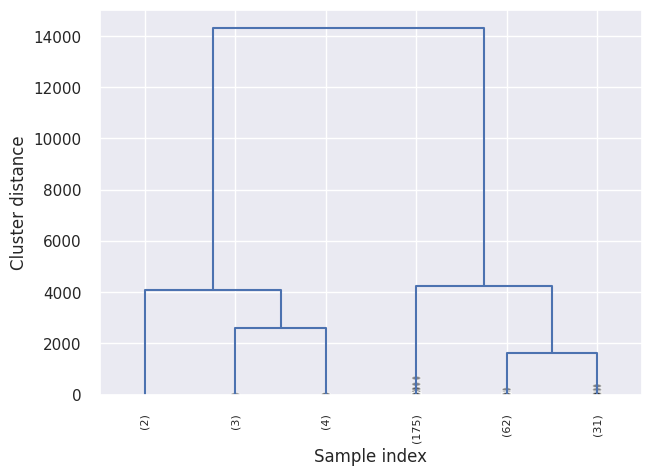

In [61]:
plt.figure(figsize=(7,5))
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');
dendrogram(Z,leaf_rotation=90.,leaf_font_size=8,color_threshold=0.2*83,truncate_mode='lastp',p=6,show_leaf_counts=True,show_contracted=True)
plt.show()

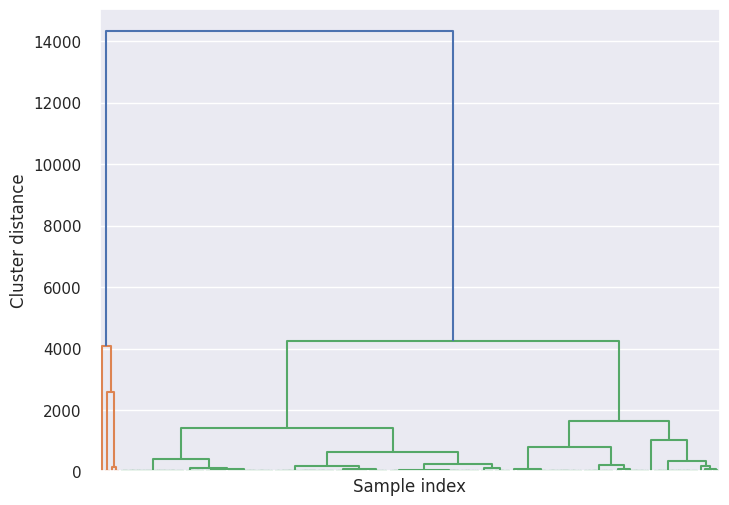

In [63]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(8,6))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'), no_labels=True, truncate_mode='level')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

In [125]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)
print(hc.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 0 2 1 1 0 1 1
 0 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2
 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1]


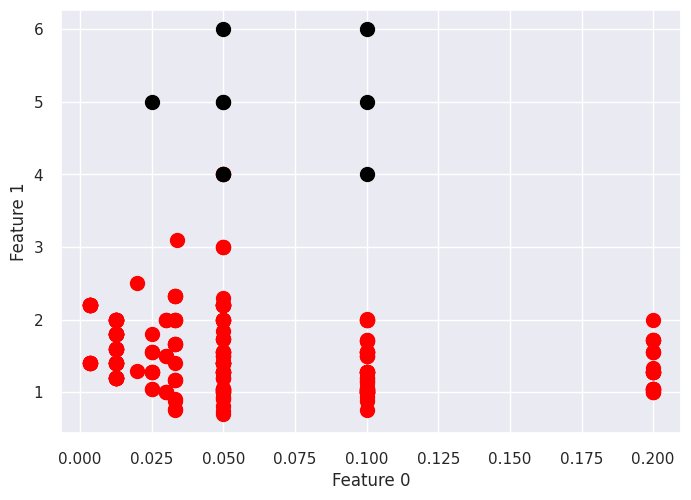

In [69]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='black')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

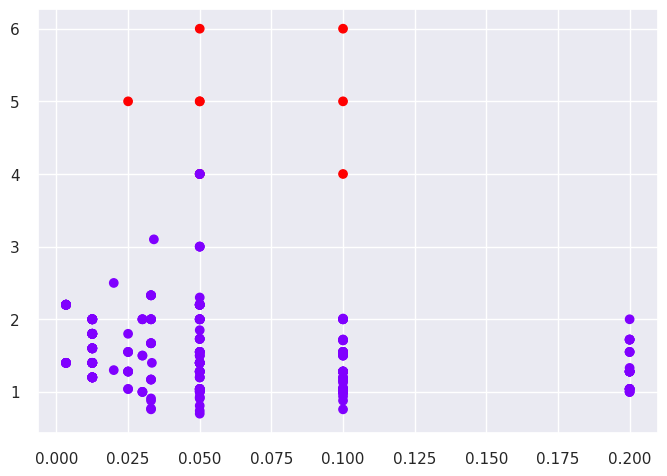

In [70]:
plt.scatter(X[:,0],X[:,1], c=hc.labels_, cmap='rainbow');

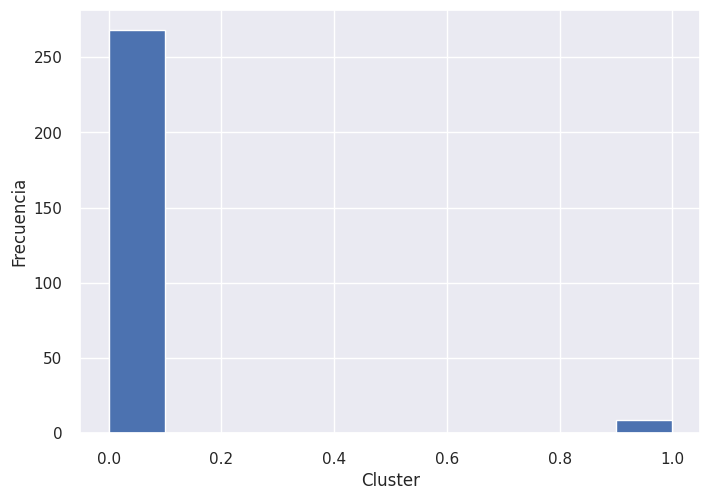

In [71]:
prueba=pd.Series(hc.labels_)
plt.hist(prueba)
plt.xlabel('Cluster')
plt.ylabel('Frecuencia');

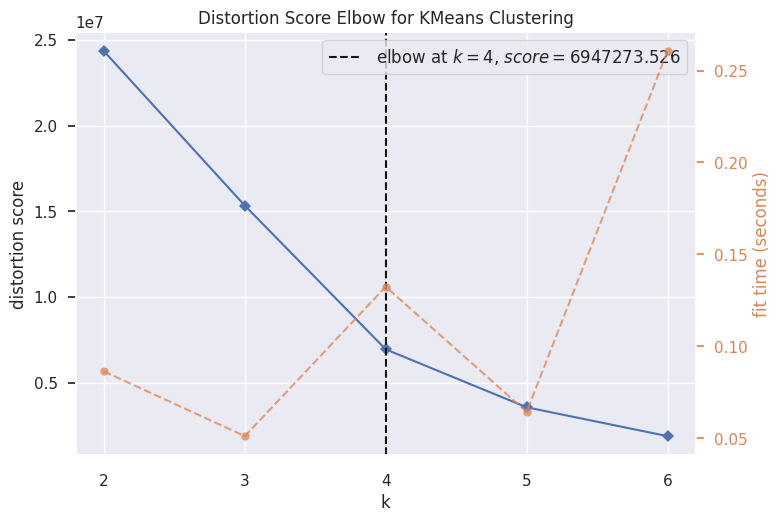

In [124]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(2,7),ax=ax)
visualizer.fit(X)

ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

# PCA

In [76]:
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
## GGG

In [74]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [90]:
X = df_simpl.iloc[:,:-1]
scaler=StandardScaler()
ld=scaler.fit(X)
X_scaled=ld.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,m (slope),T (s),Lo (cm),Ho (cm)
0,-0.866025,-0.582417,-0.403541,-0.166287
1,-0.866025,-0.582417,-0.403541,-0.138276
2,-0.866025,-0.582417,-0.403541,0.132505
3,-0.866025,-0.582417,-0.403541,0.393949
4,-0.866025,-0.582417,-0.403541,0.104494
...,...,...,...,...
272,-0.171861,1.692677,0.148246,-0.054240
273,-0.171861,1.692677,0.170412,0.412624
274,-0.171861,2.956618,0.437882,-0.521104
275,-0.171861,2.956618,0.470392,-0.054240


In [88]:
# X = df_simpl.iloc[:,:-1]
# scaler=StandardScaler()
# ld=scaler.fit(X[["T (s)", "Lo (cm)","Ho (cm)"]])
# X_scaled = ld.transform(X[["T (s)", "Lo (cm)","Ho (cm)"]])
# X_scaled = pd.DataFrame(X_scaled, columns=["T (s)", "Lo (cm)","Ho (cm)"])
# X_scaled["m (slope)"] = X["m (slope)"]
# # X_scaled["Ho (cm)"] = X["Ho (cm)"]
# X_scaled

,T (s),Lo (cm),Ho (cm),m (slope)
0,-0.582417,-0.403541,-0.166287,0.0125
1,-0.582417,-0.403541,-0.138276,0.0125
2,-0.582417,-0.403541,0.132505,0.0125
3,-0.582417,-0.403541,0.393949,0.0125
4,-0.582417,-0.403541,0.104494,0.0125
...,...,...,...,...
272,1.692677,0.148246,-0.054240,0.0500
273,1.692677,0.170412,0.412624,0.0500
274,2.956618,0.437882,-0.521104,0.0500
275,2.956618,0.470392,-0.054240,0.0500


In [91]:
mean_vect = np.mean(X_scaled, axis=0)
cov_matrix = (X_scaled - mean_vect).T.dot((X_scaled - mean_vect))/(X_scaled.shape[0]-1)
print("La matriz de covarianzas es \n%s"%cov_matrix)

La matriz de covarianzas es 
           m (slope)     T (s)   Lo (cm)   Ho (cm)
m (slope)   1.003623 -0.145955 -0.069581 -0.082839
T (s)      -0.145955  1.003623  0.909828  0.169854
Lo (cm)    -0.069581  0.909828  1.003623  0.176538
Ho (cm)    -0.082839  0.169854  0.176538  1.003623


In [92]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.0035208  0.0904738  0.91430537 1.00619278]
Vectores propios 
[[-0.16621771  0.06053314 -0.53974093 -0.82303532]
 [ 0.67782218  0.70843395  0.11451871 -0.15988713]
 [ 0.67204128 -0.70311023  0.05750075 -0.22514482]
 [ 0.24756672  0.00964803 -0.83202095  0.49634542]]


In [93]:
corr_matrix = np.corrcoef(X.T)
eig_vals_corr, eig_vectors_corr = np.linalg.eig(corr_matrix)
print("Valores propios \n%s"%eig_vals_corr)
print("Vectores propios \n%s"%eig_vectors_corr)

Valores propios 
[1.99628787 0.09014718 0.91100463 1.00256032]
Vectores propios 
[[-0.16621771  0.06053314 -0.53974093 -0.82303532]
 [ 0.67782218  0.70843395  0.11451871 -0.15988713]
 [ 0.67204128 -0.70311023  0.05750075 -0.22514482]
 [ 0.24756672  0.00964803 -0.83202095  0.49634542]]


In [94]:
u,s,v = np.linalg.svd(X_scaled.T)
u

array([[-0.16621771, -0.82303532,  0.53974093, -0.06053314],
       [ 0.67782218, -0.15988713, -0.11451871, -0.70843395],
       [ 0.67204128, -0.22514482, -0.05750075,  0.70311023],
       [ 0.24756672,  0.49634542,  0.83202095, -0.00964803]])

## PCA-ScikitLearn

In [97]:
n =  X.shape[1] # número de features
pca = PCA(n_components=n).fit(X_scaled)
print(pca.components_)

[[-0.16621771  0.67782218  0.67204128  0.24756672]
 [-0.82303532 -0.15988713 -0.22514482  0.49634542]
 [ 0.53974093 -0.11451871 -0.05750075  0.83202095]
 [ 0.06053314  0.70843395 -0.70311023  0.00964803]]


In [98]:
print(pca.explained_variance_ratio_)

[0.49907197 0.25064008 0.22775116 0.02253679]


Text(0, 0.5, 'cumulative explained variance')

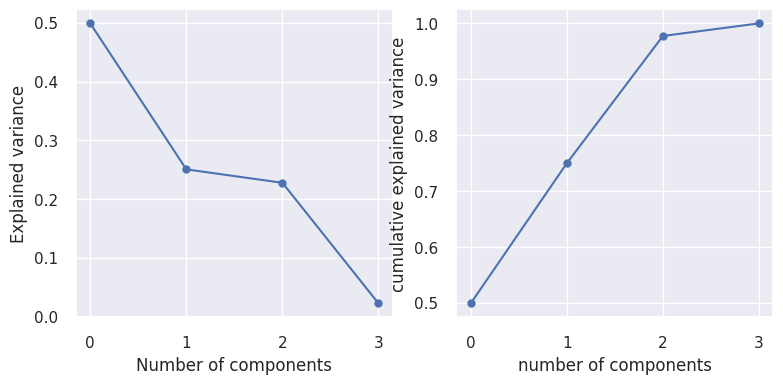

In [106]:
fig, ax = plt.subplots(1,2,figsize = [9,4])
ax[0].plot(pca.explained_variance_ratio_,marker="o")
ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Explained variance')
ax[1].plot(np.cumsum(pca.explained_variance_ratio_),marker="o")
ax[1].set_xlabel('number of components')
ax[1].set_ylabel('cumulative explained variance')

In [108]:
pca_samples = pca.transform(X_scaled)
pca_samples

array([[-0.56319   ,  0.81420907, -0.51588197, -0.1828973 ],
       [-0.55625521,  0.82811261, -0.49257555, -0.18262704],
       [-0.48921886,  0.96251349, -0.26728014, -0.18001454],
       ...,
       [ 2.19789481, -0.68851176, -0.89009641,  1.77125834],
       [ 2.33532293, -0.46410563, -0.50352542,  1.75290439],
       [ 2.47672345, -0.24103031, -0.11729432,  1.73039439]])

In [112]:
iris.target_names

'sepal length (cm)'

In [111]:
c, i, iris.target_names

('r', 3, 'sepal length (cm)')

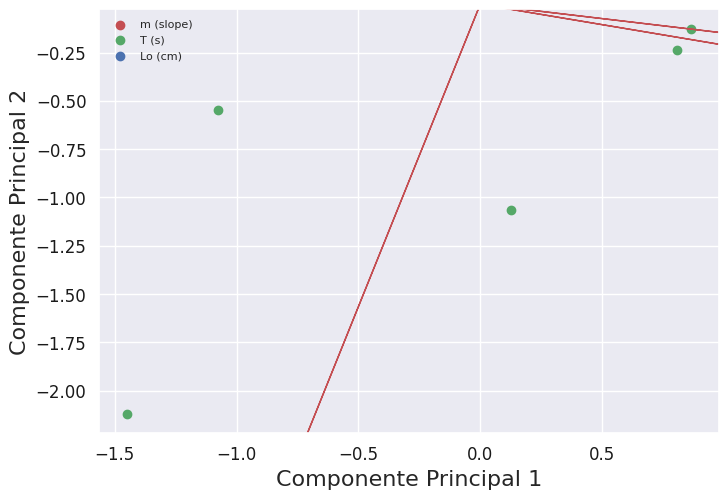

In [120]:
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(X_scaled)[:,0] 
ys = pca.transform(X_scaled)[:,1]

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    # plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
    #          list(X_scaled.columns.values)[i], color='r') 

for c, i, iris.target_names in zip("rgb", [0, 1, 2], iris.feature_names):
   plt.scatter(pca_samples[Y==i,0], pca_samples[Y==i,1], c=c)
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
# plt.ylim([-10,10])
# plt.xlim([-10,10])
plt.legend(X.columns, fontsize=8)
plt.show()

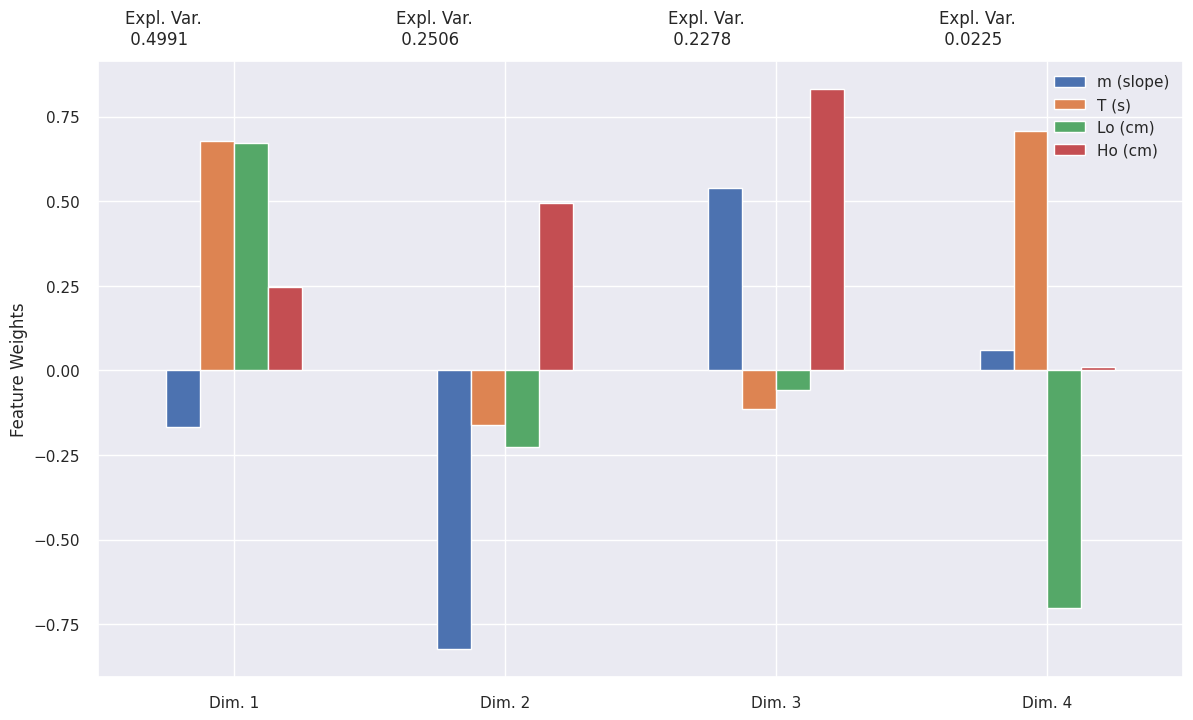

In [121]:
def pca_results(X_scaled, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = X_scaled.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(X_scaled, pca)

In [122]:
print(pca_results.cumsum())

        Explained Variance  m (slope)   T (s)  Lo (cm)  Ho (cm)
Dim. 1              0.4991    -0.1662  0.6778   0.6720   0.2476
Dim. 2              0.7497    -0.9892  0.5179   0.4469   0.7439
Dim. 3              0.9775    -0.4495  0.4034   0.3894   1.5759
Dim. 4              1.0000    -0.3890  1.1118  -0.3137   1.5855
